# 第一步：加载德国信贷数据集

In [1]:
import scorecardpy as sc
dat = sc.germancredit()
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype   
---  ------                                                    --------------  -----   
 0   status.of.existing.checking.account                       1000 non-null   category
 1   duration.in.month                                         1000 non-null   int64   
 2   credit.history                                            1000 non-null   category
 3   purpose                                                   1000 non-null   object  
 4   credit.amount                                             1000 non-null   int64   
 5   savings.account.and.bonds                                 1000 non-null   category
 6   present.employment.since                                  1000 non-null   category
 7   installment.rate.in.percentage.of.disposable.income       1000 non-null   int64   
 8   personal.

In [2]:
# 查看基本信息
print(dat["creditability"].nunique())

2


In [3]:
# 第二步：通过数据缺失率、IV值、相同值来过滤变量
dt_s = sc.var_filter(dat, y="creditability")

[INFO] filtering variables ...


D:\installFile\Anaconda3\lib\site-packages\scorecardpy\condition_fun.py:113: UserWarning: The positive value in "creditability" was replaced by 1 and negative value by 0.
  warnings.warn("The positive value in \"{}\" was replaced by 1 and negative value by 0.".format(y))


In [4]:
dt_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                                               Non-Null Count  Dtype   
---  ------                                               --------------  -----   
 0   other.installment.plans                              1000 non-null   category
 1   housing                                              1000 non-null   category
 2   age.in.years                                         1000 non-null   int64   
 3   status.of.existing.checking.account                  1000 non-null   category
 4   property                                             1000 non-null   category
 5   present.employment.since                             1000 non-null   category
 6   installment.rate.in.percentage.of.disposable.income  1000 non-null   int64   
 7   credit.amount                                        1000 non-null   int64   
 8   savings.account.and.bonds                            1000 n

In [5]:
## 通过筛选，删除了7个特征

In [6]:
# 第三步：划分训练集与测试集
train, test = sc.split_df(dt_s, 'creditability').values()

In [7]:
#第四步：根据woe值进行分箱
bins = sc.woebin(dt_s, y="creditability")

[INFO] creating woe binning ...


In [8]:
bins["housing"]

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,housing,rent,179,0.179,109,70,0.391061,0.404445,0.031393,0.083293,rent,False
1,housing,own,713,0.713,527,186,0.260870,-0.194156,0.025795,0.083293,own,False
2,housing,for free,108,0.108,64,44,0.407407,0.472604,0.026106,0.083293,for free,False


In [9]:
dt_s["other.debtors.or.guarantors"].unique()

['none', 'guarantor', 'co-applicant']
Categories (3, object): ['none' < 'co-applicant' < 'guarantor']

In [10]:
bins["age.in.years"]

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,age.in.years,"[-inf,26.0)",190,0.190,110,80,0.421053,0.528844,0.057921,0.130499,26.0,False
1,age.in.years,"[26.0,28.0)",101,0.101,74,27,0.267327,-0.160930,0.002529,0.130499,28.0,False
2,age.in.years,"[28.0,35.0)",257,0.257,172,85,0.330739,0.142455,0.005359,0.130499,35.0,False
3,age.in.years,"[35.0,37.0)",79,0.079,67,12,0.151899,-0.872488,0.048610,0.130499,37.0,False
4,age.in.years,"[37.0,inf)",373,0.373,277,96,0.257373,-0.212371,0.016080,0.130499,inf,False


In [11]:
bins["other.debtors.or.guarantors"]

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,other.debtors.or.guarantors,"none%,%co-applicant",948,0.948,658,290,0.305907,0.027974,0.000746,0.01642,"none%,%co-applicant",False
1,other.debtors.or.guarantors,guarantor,52,0.052,42,10,0.192308,-0.587787,0.015674,0.01642,guarantor,False


{'other.installment.plans': <Figure size 432x288 with 2 Axes>,
 'housing': <Figure size 432x288 with 2 Axes>,
 'age.in.years': <Figure size 432x288 with 2 Axes>,
 'status.of.existing.checking.account': <Figure size 432x288 with 2 Axes>,
 'property': <Figure size 432x288 with 2 Axes>,
 'purpose': <Figure size 432x288 with 2 Axes>,
 'present.employment.since': <Figure size 432x288 with 2 Axes>,
 'installment.rate.in.percentage.of.disposable.income': <Figure size 432x288 with 2 Axes>,
 'credit.amount': <Figure size 432x288 with 2 Axes>,
 'duration.in.month': <Figure size 432x288 with 2 Axes>,
 'savings.account.and.bonds': <Figure size 432x288 with 2 Axes>,
 'credit.history': <Figure size 432x288 with 2 Axes>,
 'other.debtors.or.guarantors': <Figure size 432x288 with 2 Axes>}

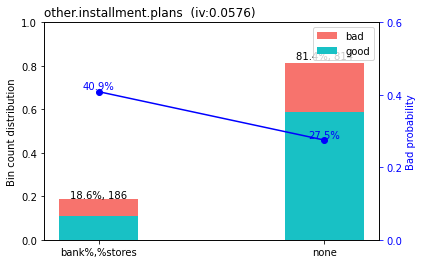

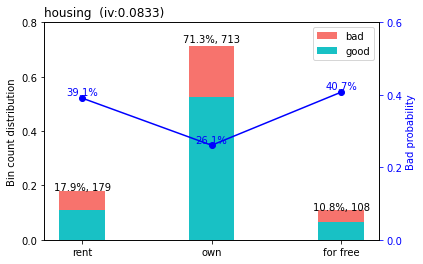

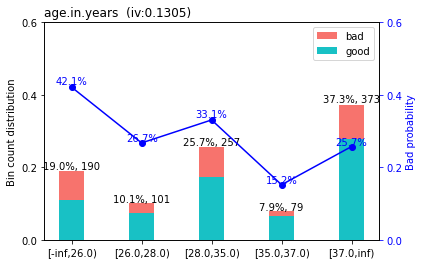

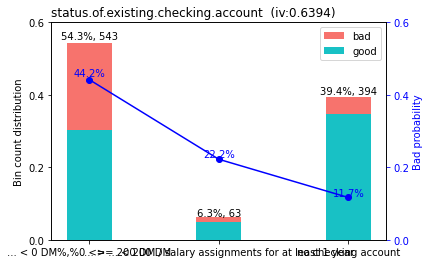

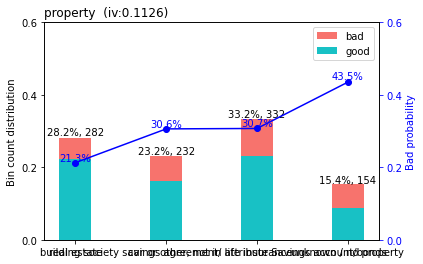

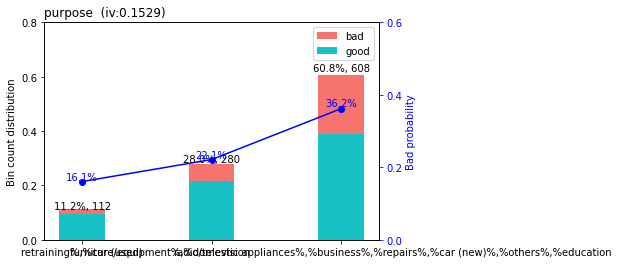

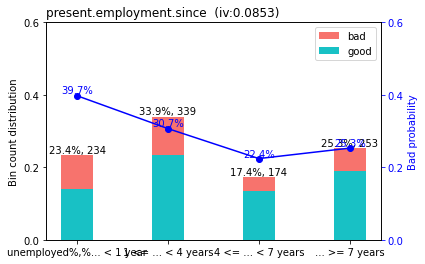

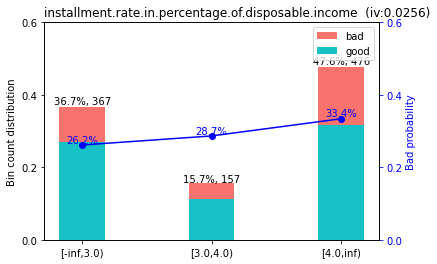

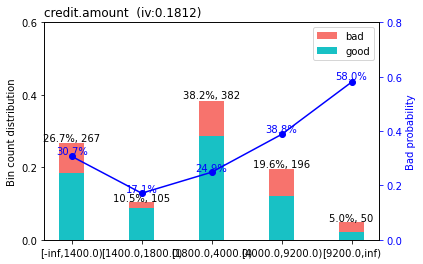

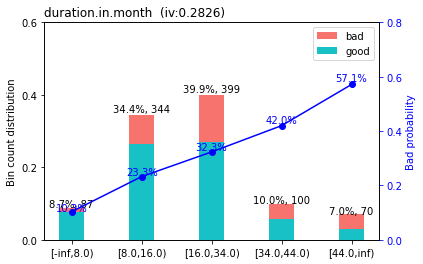

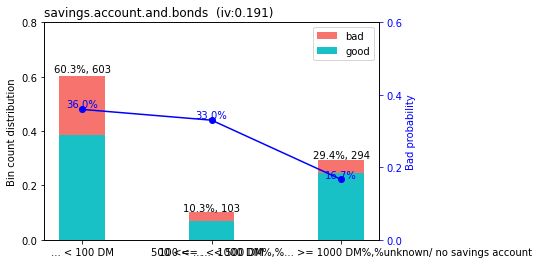

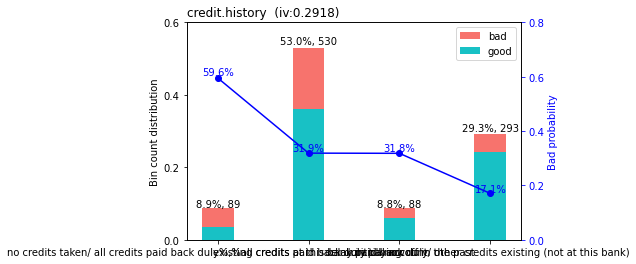

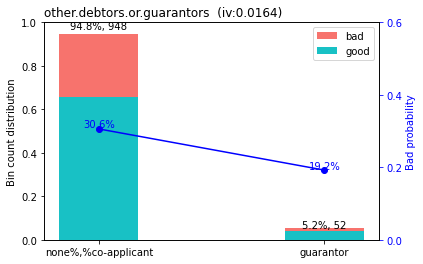

In [12]:
sc.woebin_plot(bins)

In [13]:
#手动设置分箱边界点
breaks_adj = {
    'age.in.years': [26, 35, 40],
    'other.debtors.or.guarantors': ["none", "co-applicant%,%guarantor"]
}
bins_adj = sc.woebin(dt_s, y="creditability", breaks_list=breaks_adj)
bins_adj["age.in.years"]

[INFO] creating woe binning ...


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,age.in.years,"[-inf,26.0)",190,0.190,110,80,0.421053,0.528844,0.057921,0.112742,26.0,False
1,age.in.years,"[26.0,35.0)",358,0.358,246,112,0.312849,0.060465,0.001324,0.112742,35.0,False
2,age.in.years,"[35.0,40.0)",153,0.153,123,30,0.196078,-0.563689,0.042679,0.112742,40.0,False
3,age.in.years,"[40.0,inf)",299,0.299,221,78,0.260870,-0.194156,0.010817,0.112742,inf,False


In [14]:
bins_adj["other.debtors.or.guarantors"]

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,other.debtors.or.guarantors,none,907,0.907,635,272,0.299890,-0.000525,2.500344e-07,0.000003,none,False
1,other.debtors.or.guarantors,"co-applicant%,%guarantor",93,0.093,65,28,0.301075,0.005115,2.435762e-06,0.000003,"co-applicant%,%guarantor",False


In [15]:
# 对训练集和测试集woe编码，用上面的分箱后的结果
train_woe = sc.woebin_ply(train, bins_adj)
test_woe = sc.woebin_ply(test, bins_adj)

[INFO] converting into woe values ...


D:\installFile\Anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


[INFO] converting into woe values ...


In [16]:
#构建数据集
y_train = train_woe.loc[:,'creditability']
X_train = train_woe.loc[:,train_woe.columns != 'creditability']
y_test = test_woe.loc[:,'creditability']
X_test = test_woe.loc[:,train_woe.columns != 'creditability']

In [17]:
# 定义逻辑回归模型
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)

#开始训练
lr.fit(X_train, y_train)
# lr.coef_   #打印权重
# lr.intercept_   #打印偏移量


LogisticRegression(C=0.9, n_jobs=-1, penalty='l1', solver='saga')

In [18]:
# 预测测试集，输出概率
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]  #输出第二列的概率
test_pred[:10]

array([0.53764843, 0.57575584, 0.57660868, 0.62062318, 0.18697721,
       0.59479675, 0.04967391, 0.10482601, 0.13418994, 0.29064445])

D:\installFile\Anaconda3\lib\site-packages\scorecardpy\perf.py:318: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(subplot_nrows,subplot_ncols,i+1)
D:\installFile\Anaconda3\lib\site-packages\scorecardpy\perf.py:318: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(subplot_nrows,subplot_ncols,i+1)


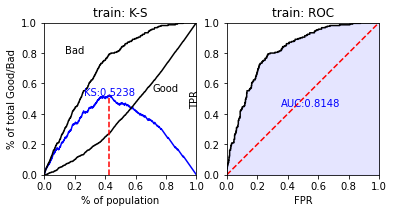

D:\installFile\Anaconda3\lib\site-packages\scorecardpy\perf.py:318: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(subplot_nrows,subplot_ncols,i+1)
D:\installFile\Anaconda3\lib\site-packages\scorecardpy\perf.py:318: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(subplot_nrows,subplot_ncols,i+1)


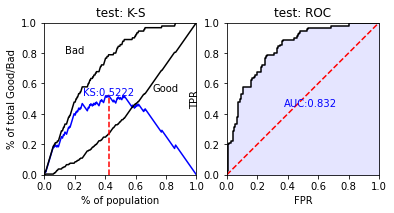

{'KS': 0.5222,
 'AUC': 0.832,
 'Gini': 0.664,
 'pic': <Figure size 432x288 with 2 Axes>}

In [19]:
# 计算模型的ks值与roc ------
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")
test_perf

In [20]:
# score ------
card = sc.scorecard(bins_adj, lr, X_train.columns)
card["basepoints"]

,variable,bin,points
0,basepoints,NaN,447


     variable  bin  points
0  basepoints  NaN     447
A2:A3
A4:A6
A7:A10
A11:A13
A14:A17
A18:A20
A21:A24
A25:A27
A28:A32
A33:A37
A38:A40
A41:A44


In [51]:
# credit score
train_score = sc.scorecard_ply(train, card, print_step=0)
test_score = sc.scorecard_ply(test, card, print_step=0)
test_score

D:\installFile\Anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
D:\installFile\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


,score
1,377.0
3,367.0
9,366.0
10,351.0
12,493.0
...,...
979,334.0
987,638.0
991,510.0
993,353.0


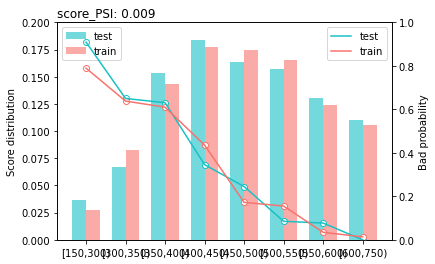

{'psi':   variable       PSI
 0    score  0.008984,
 'pic': {'score': <Figure size 432x288 with 2 Axes>}}

In [52]:
# psi
sc.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

In [65]:
##将评分卡转成excel格式
# -*- coding:utf-8 -*-

import xlsxwriter
import numpy as np

# 创建一个excel
workbook = xlsxwriter.Workbook("card.xlsx", {'nan_inf_to_errors': True})

# 创建一个sheet
worksheet = workbook.add_worksheet()
# worksheet = workbook.add_worksheet("bug_analysis")

# 自定义样式，加粗
bold = workbook.add_format({'bold': 1})



headings = ["variable","bin","points"]
worksheet.write(0, 0 ,headings[0], style)
worksheet.write(0, 1 ,headings[1], style )
worksheet.write(0, 2 ,headings[2], style)
        
color = ["#FFC0CB", "#87CEFA", "#F0E68C", "	#FFDAB9"]
color_index = 0
index = 1
for key in card.keys():
    style= workbook.add_format({
    "fg_color": color[color_index % 3],  # 单元格的背景颜色
    "bold": 1,  # 字体加粗
    "align": "center",  # 对齐方式
    "valign": "vcenter",  # 字体对齐方式
    #"font_color": "red" , # 字体颜色
    'font_name':'Times New Roman'
    
})
    style_other = workbook.add_format({'align': 'center', 'font_name':'Times New Roman', "fg_color": color[color_index % 3]})
    
    if card[key].shape[0] < 2:
        print(card[key])
        worksheet.write(index, 0 ,str(card[key].iloc[0][0]), style)
        worksheet.write(index, 1 ,str(card[key].iloc[0][1]), style_other )
        worksheet.write(index, 2 ,str(card[key].iloc[0][2]), style_other)
        index += 1
        color_index += 1
    else:
        pre_index = index
        df = card[key]
        for i in np.arange(0,df.shape[0]):
            worksheet.write(index, 0 ,df.iloc[i][0], style)
            worksheet.write(index, 1 ,df.iloc[i][1], style_other)
            worksheet.write(index, 2 ,df.iloc[i][2], style_other)
            index += 1
        if (index - pre_index)>1:
            
            merge_select = 'A' + str(pre_index+1) +  ':' + 'A' + str(index) 
            print(merge_select)
            worksheet.merge_range(merge_select , key, style)
        
        color_index += 1


workbook.close()

     variable  bin  points
0  basepoints  NaN     447
A3:A4
A5:A7
A8:A11
A12:A14
A15:A18
A19:A21
A22:A25
A26:A28
A29:A33
A34:A38
A39:A41
A42:A45
